In [1]:
%matplotlib inline

Automatically created module for IPython interactive environment
[[ -3.03833582e-01   2.94474274e-01]
 [ -2.05978265e+00   6.67112449e-01]
 [  4.45529910e-01   6.76886802e-01]
 [  8.95775628e-01   4.16389756e-01]
 [ -6.07661803e-01   4.70723983e-01]
 [  1.24367851e+00  -1.94161777e+00]
 [ -4.79675420e-01  -1.30465062e+00]
 [ -9.58383702e-01   6.94572374e-01]
 [ -4.34299665e-01   9.52772585e-01]
 [  7.69391013e-01   1.13156136e+00]
 [ -6.02300030e-02   5.20475344e-01]
 [  7.06896660e-01   2.42556612e-01]
 [ -1.28548338e-01   8.66391254e-01]
 [ -8.09116188e-01   8.20502806e-01]
 [ -1.23828811e+00   7.41794317e-01]
 [ -6.67724619e-01  -1.03781500e+00]
 [ -1.81467967e+00  -2.91920479e-01]
 [ -1.52781306e+00  -1.00852607e+00]
 [ -4.41893762e-01  -1.82029923e+00]
 [ -1.24918703e-01   1.03880727e+00]
 [  3.00629533e-01   1.10646280e+00]
 [ -2.06486210e-01   1.20015579e+00]
 [ -4.73576835e-01   1.26053404e+00]
 [  1.29110583e+00  -1.86528417e+00]
 [ -1.88437864e-01   5.69276866e-01]
 [ -2.4057

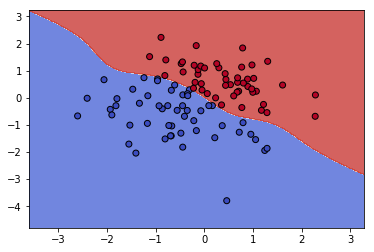

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import svm
import itertools


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    result = []
    for (i, j) in itertools.product(range(len(xx)), range(len(xx[0]))):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))
        
    Z = np.array(result).reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Take the first two features. We could avoid this by using a two-dim dataset

num_samples=100
num_features=2

samples = np.array(np.random.normal(size=num_samples * num_features).reshape(num_samples, num_features))
    
labels = 2 * (samples.sum(axis=1) > 0) - 1.0


C = 1  # SVM regularization parameter

trainer = svm.SVMTrainer(svm.Kernel.gaussian(0.7))
    
predictor = trainer.train(samples, labels)

# Set-up 2x2 grid for plotting.

plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = samples[:, 0], samples[:, 1]

xx, yy = make_meshgrid(X0, X1)


plot_contours(plt, predictor, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c = labels, cmap=plt.cm.coolwarm, edgecolors='k')
plt.show()
